# Model Training and Image Generation

In this notebook we will explore the core functionalities of our module.

Our first task is to train a model. For convinience sake, we will use a small amount of training epochs, but **better models will be included already trained** to try generation.

In this notebook we will be working with the MNIST dataset (on 3 channels) and CIFAR-10.

We will start configuring our system.

<font color='red'>The cell below downloads pretrained models</font>

In [ ]:
import sys
import os

# Get the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

from fetch_models import main
main()

In [1]:
import selections
from IPython.display import display

display(selections.get_widgets())

Please note that for Variance Exploding methods you cannot use the Probability Flow ODE because of mathematical and interpretative challenges nor noise schedules. Noise schedules like linear or cosine $\beta(t)$ are fundamental to the definition of the VP process because they control both the noise injection and the corrective drift. The VE process is defined differently, primarily by its diffusion coefficient $g(t)$ and lacks the drift term tied to noise addition, so the same concept of a $\beta(t)$ noise schedule isn't directly applicable or necessary in its standard formulation.


In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
command = selections.construct_command(mode="train")

Constructed Command (mode=train):
 python ../main.py --dataset mnist --mode train --process vp --notebook_tqdm --model_path 'mnist_model/model_vp_linear_uncond_class_all_sz28.pth' --epochs 40 --batch_size 32 --lr 0.00019952623149688788 --use_class_condition --target_class 0 --schedule linear --beta_min 0.01 --beta_max 0.999


In [18]:
!cd .. && {command}

Using device: cuda
Selected mode: train
Selected diffusion process: vp
Using VP Schedule: cosine
Initializing VP diffusion process with cosine schedule, T=1.0.
Filtering MNIST dataset for class 0
Using 5923 samples for class 0
Training model (VP) with class conditioning: True
Saving model to: mnist_model/test_ve_class_0.pth
Getting ScoreModel using marginal_prob std dev from VP process.
Training epochs:   0%|          | 0/20 [00:00<?, ?it/s]
--- Starting Training --- 
Process: VP
Class conditioning: True
Num classes: 10
Epochs: 20, Batch size: 32, LR: 0.00019952623149688788
Saving model to: mnist_model/test_ve_class_0.pth
-------------------------
Epoch 10/20:   0%|          | 0/186 [00:00<?, ?it/s]

Saved checkpoint: mnist_model/test_ve_class_0_epoch10.pth
Epoch 20/20:   0%|          | 0/186 [00:00<?, ?it/s]

Saved checkpoint: mnist_model/test_ve_class_0_epoch20.pth

Training completed. Final model saved to mnist_model/test_ve_class_0.pth


In [4]:
command = selections.construct_command(mode="generate")

Constructed Command (mode=generate):
 python ../main.py --dataset mnist --mode generate --process vp --notebook_tqdm --model_path 'mnist_model/model_vp_linear_uncond_class_all_sz28.pth' --sampler euler --gen_steps 1000 --gen_eps 0.001 --use_class_condition --target_class 0 --num_generate 16 --schedule linear --beta_min 0.01 --beta_max 0.999


In [28]:
!cd .. && {command}

Using device: cuda
Selected mode: generate
Selected diffusion process: vp
Using VP Schedule: cosine
Initializing VP diffusion process with cosine schedule, T=1.0.
Loading model from: mnist_model/test_ve_class_0.pth
Loading model as conditional based on --use_class_condition flag.
Getting ScoreModel using marginal_prob std dev from VP process.
Generating 16 images (VP) for class 0 using 1000 steps with euler sampler...
Generating class 0 using conditioning.
Generating 16 images using VP reverse SDE (euler) with 1000 steps...
Using Euler-Maruyama sampler.
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to mnist_results/generated_test_ve_class_0_class0.png


# Class Conditional  - MNIST

We already have a pretrained model for our dataset (MNIST on 3 channels this time). Let's check how easy it is for us to generate a sample from a given class.

We just have to specify the desired class in the following command:

```bash
python main.py --mode generate --process ve --image_channels 3 --image_size 28 --notebook_tqdm --model_path 'mnist_model/ve_50_conditional.pth' --sampler euler --gen_steps 1000 --gen_eps 0.001 --use_class_condition --target_class 0 --num_generate 16
 ```

where `--target_class` indicates the class we desire.

Let's try it out!

Please note that some models may work with some samplers than with others.

We start generating class 0 using Euler-Maruyama sampler.

In [4]:
from PIL import Image
import matplotlib.pyplot as plt


def show_image(image_path):
    image = Image.open(image_path)
    
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()


In [2]:
!cd .. && \
python main.py \
    --mode generate \
    --process ve \
    --image_channels 3 \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/ve_50_conditional.pth' \
    --sampler euler \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --use_class_condition \
    --target_class 0 \
    --num_generate 16


Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: ve
Initializing VE diffusion process with sigma=25.0, T=1.0
Loading model from: mnist_model/ve_50_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/ve_50_conditional.pth
Getting ScoreModel configured for VE process.
Model loaded successfully.
Generating 16 MNIST images (VE) for class 0 using 1000 steps with euler sampler...
Generating 16 images conditionally for class 0.
Generating 16 images using VE reverse SDE...
Sampler: euler, Steps: 1000, T_end=0.001
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to mnist_results/generated_ve_50_conditional_class0.png


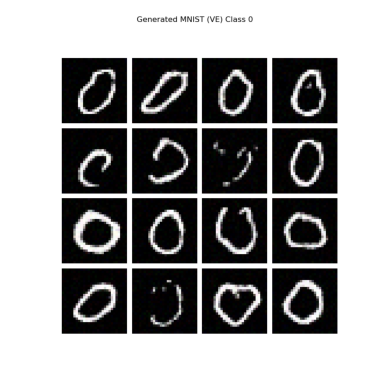

In [5]:
image_path = '../mnist_results/generated_ve_50_conditional_class0.png'
show_image(image_path)

We can now try with class 7 and predictor corrector.

In [4]:
!cd .. && \
python main.py \
    --mode generate \
    --process ve \
    --image_channels 3 \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/ve_50_conditional.pth' \
    --sampler pc \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --use_class_condition \
    --target_class 7 \
    --num_generate 16

Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: ve
Initializing VE diffusion process with sigma=25.0, T=1.0
Loading model from: mnist_model/ve_50_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/ve_50_conditional.pth
Getting ScoreModel configured for VE process.
Model loaded successfully.
Generating 16 MNIST images (VE) for class 7 using 1000 steps with pc sampler...
Generating 16 images conditionally for class 7.
Generating 16 images using VE reverse SDE...
Sampler: pc, Steps: 1000, T_end=0.001
PC Sampler Params: SNR=0.1, Corrector Steps=1
Running PC Sampler: snr=0.1, corrector_steps=1
PC Sampling Steps:   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to mnist_results/generated_ve_50_conditional_class7.png


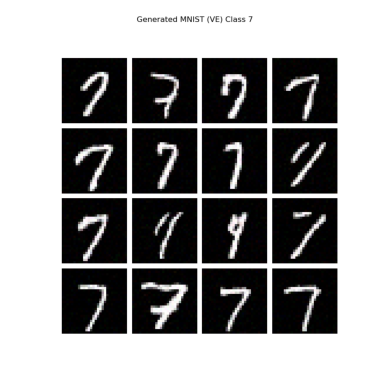

In [5]:
image_path = '../mnist_results/generated_ve_50_conditional_class7.png'
show_image(image_path)

And for class 5 both with probability flow ODE and Euler-Maruyama.

In [6]:
!cd .. && python main.py \
    --mode generate \
    --process ve \
    --image_channels 3 \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/ve_50_conditional.pth' \
    --sampler ode \
    --no_ode_rk4 \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --use_class_condition \
    --target_class 5 \
    --num_generate 16


Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: ve
Initializing VE diffusion process with sigma=25.0, T=1.0
Loading model from: mnist_model/ve_50_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/ve_50_conditional.pth
Getting ScoreModel configured for VE process.
Model loaded successfully.
Generating 16 MNIST images (VE) for class 5 using 1000 steps with ode sampler...
Generating 16 images conditionally for class 5.
Generating 16 images using VE reverse SDE...
Sampler: ode, Steps: 1000, T_end=0.001
ODE Sampler Params: RK4=No, Early Stop=None
Running Probability Flow ODE Sampler (Euler)
ODE Sampling Steps (Euler):   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to mnist_results/generated_ve_50_conditional_class5.png


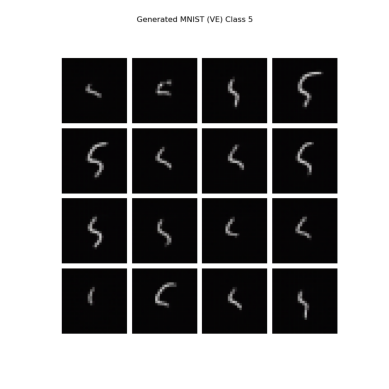

In [7]:
image_path = '../mnist_results/generated_ve_50_conditional_class5.png'
show_image(image_path)

In [8]:
!cd .. && python main.py \
    --mode generate \
    --process ve \
    --image_channels 3 \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/ve_50_conditional.pth' \
    --sampler euler \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --use_class_condition \
    --target_class 5 \
    --num_generate 16


Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: ve
Initializing VE diffusion process with sigma=25.0, T=1.0
Loading model from: mnist_model/ve_50_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/ve_50_conditional.pth
Getting ScoreModel configured for VE process.
Model loaded successfully.
Generating 16 MNIST images (VE) for class 5 using 1000 steps with euler sampler...
Generating 16 images conditionally for class 5.
Generating 16 images using VE reverse SDE...
Sampler: euler, Steps: 1000, T_end=0.001
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to mnist_results/generated_ve_50_conditional_class5.png


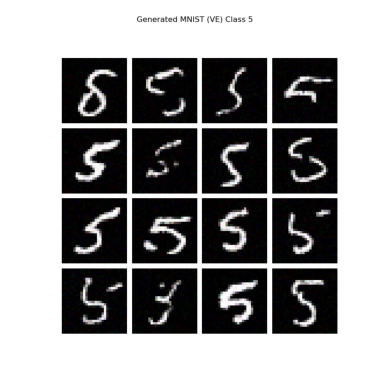

In [9]:
image_path = '../mnist_results/generated_ve_50_conditional_class5.png'
show_image(image_path)

We can also try with the **VP** process (and a **linear** schedule in this case).

**Euler-Maruyama**

In [10]:
!cd .. && python main.py \
    --mode generate \
    --process vp \
    --schedule linear \
    --image_channels 3 \
    --use_class_condition \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/vp_linear_40_conditional.pth' \
    --sampler euler \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --target_class 5 \
    --beta_min 0.01 \
    --beta_max 0.999 \
    --num_generate 16


Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: vp
Using VP Schedule: linear
Initializing VP diffusion process with linear schedule, T=1.0.
Loading model from: mnist_model/vp_linear_40_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/vp_linear_40_conditional.pth
Getting ScoreModel configured for VP process.
Model loaded successfully.
Generating 16 MNIST images (VP) for class 5 using 1000 steps with euler sampler...
Generating 16 images conditionally for class 5.
Generating 16 images using VP reverse SDE...
Sampler: euler, Steps: 1000, T_end=0.001
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to mnist_results/generated_vp_linear_40_conditional_class5.png


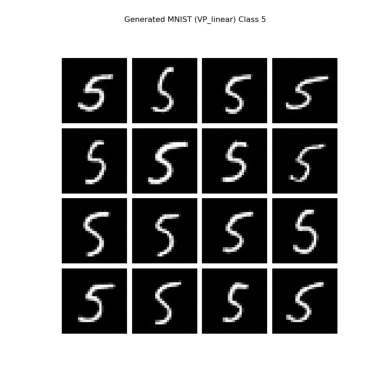

In [11]:
image_path = '../mnist_results/generated_vp_linear_40_conditional_class5.png'
show_image(image_path)

**Exponential Integrator**

In [12]:
!cd .. && python main.py \
    --mode generate \
    --process vp \
    --schedule linear \
    --image_channels 3 \
    --use_class_condition \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/vp_linear_40_conditional.pth' \
    --sampler ei \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --target_class 6 \
    --beta_min 0.01 \
    --beta_max 0.999 \
    --num_generate 16


Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: vp
Using VP Schedule: linear
Initializing VP diffusion process with linear schedule, T=1.0.
Loading model from: mnist_model/vp_linear_40_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/vp_linear_40_conditional.pth
Getting ScoreModel configured for VP process.
Model loaded successfully.
Generating 16 MNIST images (VP) for class 6 using 1000 steps with ei sampler...
Generating 16 images conditionally for class 6.
Generating 16 images using VP reverse SDE...
Sampler: ei, Steps: 1000, T_end=0.001
Using Exponential Integrator sampler.
Running Exponential Integrator Sampler (for VP)
Exp. Integrator Sampling Steps:   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to mnist_results/gener

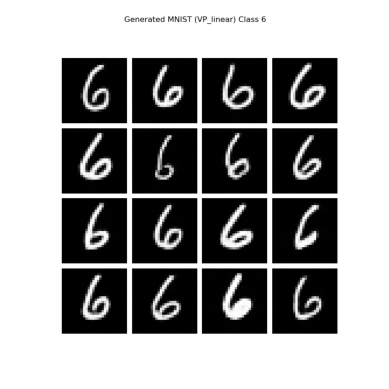

In [13]:
image_path = '../mnist_results/generated_vp_linear_40_conditional_class6.png'
show_image(image_path)

**Probability Flow ODE**

In [14]:
!cd .. && python main.py \
    --mode generate \
    --process vp \
    --schedule linear \
    --image_channels 3 \
    --use_class_condition \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/vp_linear_40_conditional.pth' \
    --sampler ode \
    --no_ode_rk4 \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --target_class 9 \
    --beta_min 0.01 \
    --beta_max 0.999 \
    --num_generate 16


Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: vp
Using VP Schedule: linear
Initializing VP diffusion process with linear schedule, T=1.0.
Loading model from: mnist_model/vp_linear_40_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/vp_linear_40_conditional.pth
Getting ScoreModel configured for VP process.
Model loaded successfully.
Generating 16 MNIST images (VP) for class 9 using 1000 steps with ode sampler...
Generating 16 images conditionally for class 9.
Generating 16 images using VP reverse SDE...
Sampler: ode, Steps: 1000, T_end=0.001
ODE Sampler Params: RK4=No, Early Stop=None
Running Probability Flow ODE Sampler (Euler)
ODE Sampling Steps (Euler):   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to mnist_results/gene

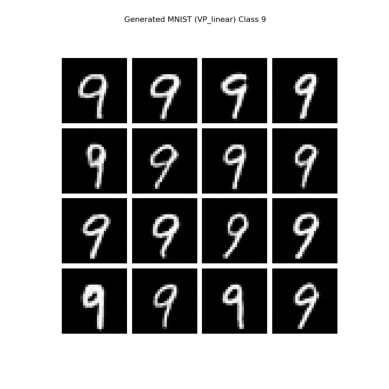

In [15]:
image_path = '../mnist_results/generated_vp_linear_40_conditional_class9.png'
show_image(image_path)

**Predictor Corrector**

In [16]:
!cd .. && python main.py \
    --mode generate \
    --process vp \
    --schedule linear \
    --image_channels 3 \
    --use_class_condition \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/vp_linear_40_conditional.pth' \
    --sampler pc \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --target_class 2 \
    --beta_min 0.01 \
    --beta_max 0.999 \
    --num_generate 16


Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: vp
Using VP Schedule: linear
Initializing VP diffusion process with linear schedule, T=1.0.
Loading model from: mnist_model/vp_linear_40_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/vp_linear_40_conditional.pth
Getting ScoreModel configured for VP process.
Model loaded successfully.
Generating 16 MNIST images (VP) for class 2 using 1000 steps with pc sampler...
Generating 16 images conditionally for class 2.
Generating 16 images using VP reverse SDE...
Sampler: pc, Steps: 1000, T_end=0.001
PC Sampler Params: SNR=0.1, Corrector Steps=1
Running PC Sampler: snr=0.1, corrector_steps=1
PC Sampling Steps:   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to mnist_results/generated_v

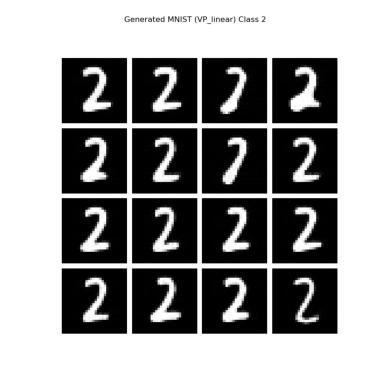

In [17]:
image_path = '../mnist_results/generated_vp_linear_40_conditional_class2.png'
show_image(image_path)

Now for **VP Cosine**

**Predictor Corrector**

In [18]:
!cd .. && python main.py \
    --mode generate \
    --process vp \
    --schedule cosine \
    --image_channels 3 \
    --use_class_condition \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/vp_cosine_50_epoch50.pth' \
    --sampler pc \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --target_class 2 \
    --num_generate 16


Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: vp
Using VP Schedule: cosine
Applying MNIST-specific cosine beta clamp [1.0e-04, 20.0]
Initializing VP diffusion process with cosine schedule, T=1.0.
  Cosine schedule using beta clamp: [1.0e-04, 20.0]
Loading model from: mnist_model/vp_cosine_50_epoch50.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/vp_cosine_50_epoch50.pth
Getting ScoreModel configured for VP process.
Model loaded successfully.
Generating 16 MNIST images (VP) for class 2 using 1000 steps with pc sampler...
Generating 16 images conditionally for class 2.
Generating 16 images using VP reverse SDE...
Sampler: pc, Steps: 1000, T_end=0.001
PC Sampler Params: SNR=0.1, Corrector Steps=1
Running PC Sampler: snr=0.1, corrector_steps=1
PC Sampling Steps:   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_i

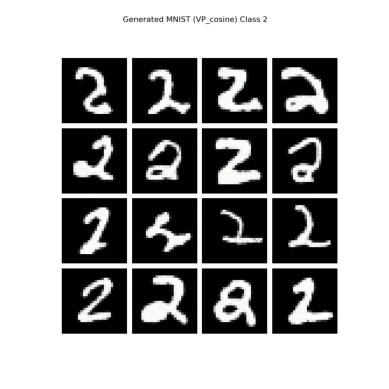

In [19]:
image_path = '../mnist_results/generated_vp_cosine_50_epoch50_class2.png'
show_image(image_path)

**Exponential Integrator**

In [20]:
!cd .. && python main.py \
    --mode generate \
    --process vp \
    --schedule cosine \
    --image_channels 3 \
    --use_class_condition \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/vp_cosine_50_epoch50.pth' \
    --sampler ei \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --target_class 3 \
    --num_generate 16

Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: vp
Using VP Schedule: cosine
Applying MNIST-specific cosine beta clamp [1.0e-04, 20.0]
Initializing VP diffusion process with cosine schedule, T=1.0.
  Cosine schedule using beta clamp: [1.0e-04, 20.0]
Loading model from: mnist_model/vp_cosine_50_epoch50.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/vp_cosine_50_epoch50.pth
Getting ScoreModel configured for VP process.
Model loaded successfully.
Generating 16 MNIST images (VP) for class 3 using 1000 steps with ei sampler...
Generating 16 images conditionally for class 3.
Generating 16 images using VP reverse SDE...
Sampler: ei, Steps: 1000, T_end=0.001
Using Exponential Integrator sampler.
Running Exponential Integrator Sampler (for VP)
Exp. Integrator Sampling Steps:   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of f

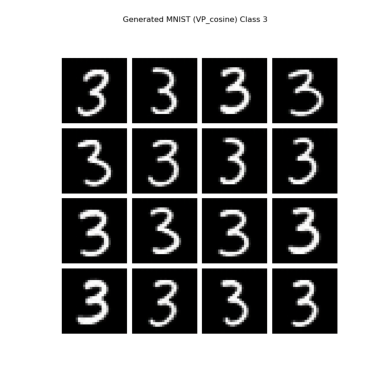

In [21]:
image_path = '../mnist_results/generated_vp_cosine_50_epoch50_class3.png'
show_image(image_path)

**Probability Flow ODE**

In [22]:
!cd .. && python main.py \
    --mode generate \
    --process vp \
    --schedule cosine \
    --image_channels 3 \
    --use_class_condition \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/vp_cosine_50_epoch50.pth' \
    --sampler ode \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --target_class 8 \
    --beta_min 0.01 \
    --beta_max 0.999 \
    --num_generate 16

Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: vp
Using VP Schedule: cosine
Applying MNIST-specific cosine beta clamp [1.0e-04, 20.0]
Initializing VP diffusion process with cosine schedule, T=1.0.
  Cosine schedule using beta clamp: [1.0e-04, 20.0]
Loading model from: mnist_model/vp_cosine_50_epoch50.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/vp_cosine_50_epoch50.pth
Getting ScoreModel configured for VP process.
Model loaded successfully.
Generating 16 MNIST images (VP) for class 8 using 1000 steps with ode sampler...
Generating 16 images conditionally for class 8.
Generating 16 images using VP reverse SDE...
Sampler: ode, Steps: 1000, T_end=0.001
ODE Sampler Params: RK4=Yes, Early Stop=None
Running Probability Flow ODE Sampler (RK4)
ODE Sampling Steps (RK4):   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of fin

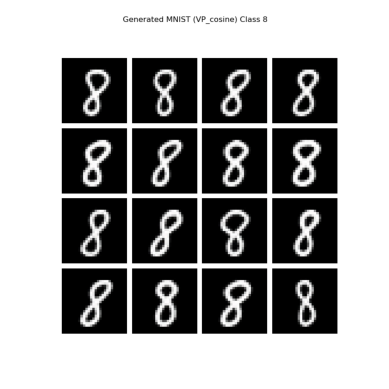

In [23]:
image_path = '../mnist_results/generated_vp_cosine_50_epoch50_class8.png'
show_image(image_path)

For **SubVP** we could not achieve results as optimal.

In [6]:
!cd .. && python main.py \
    --mode generate \
    --process subvp \
    --schedule linear \
    --image_channels 3 \
    --use_class_condition \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/subvp_linear.pth' \
    --sampler euler \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --target_class 3 \
    --num_generate 16


Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: subvp
Using Sub-VP Schedule: linear
Initializing Sub-VP diffusion process with linear schedule, T=1.0.
Loading model from: mnist_model/subvp_linear.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/subvp_linear.pth
Getting ScoreModel configured for Sub-VP process.
Model loaded successfully.
Generating 16 MNIST images (Sub-VP) for class 3 using 1000 steps with euler sampler...
Generating 16 images conditionally for class 3.
Generating 16 images using Sub-VP reverse SDE...
Sampler: euler, Steps: 1000, T_end=0.001
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to mnist_results/generated_subvp_linear_class3.png


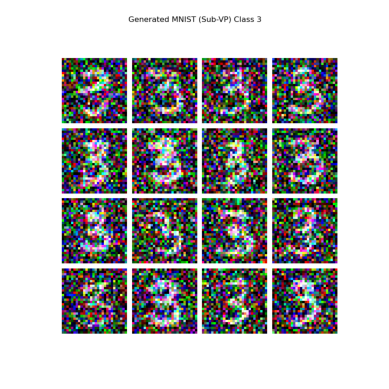

In [7]:
image_path = '../mnist_results/generated_subvp_linear_class3.png'
show_image(image_path)

In [8]:
!cd .. && python main.py \
    --mode generate \
    --process subvp \
    --schedule linear \
    --image_channels 3 \
    --use_class_condition \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'mnist_model/subvp_linear.pth' \
    --sampler ei \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --target_class 9 \
    --num_generate 16

Using device: cuda
Selected Dataset: MNIST
Selected mode: generate
Selected diffusion process: subvp
Using Sub-VP Schedule: linear
Initializing Sub-VP diffusion process with linear schedule, T=1.0.
Loading model from: mnist_model/subvp_linear.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: mnist_model/subvp_linear.pth
Getting ScoreModel configured for Sub-VP process.
Model loaded successfully.
Generating 16 MNIST images (Sub-VP) for class 9 using 1000 steps with ei sampler...
Generating 16 images conditionally for class 9.
Generating 16 images using Sub-VP reverse SDE...
Sampler: ei, Steps: 1000, T_end=0.001
Using Exponential Integrator sampler.
/home/mario/Personal/Clase/Tercero/AA3/Proyecto2/diffusion/samplers/exponential_integrator.py:59: UserWarning: Exponential Integrator is designed for VP processes. Results with other processes may be unexpected.
  warnings.warn(
Running Exponential Integrator Sampler (for VP)
Exp. Integrator Sampling St

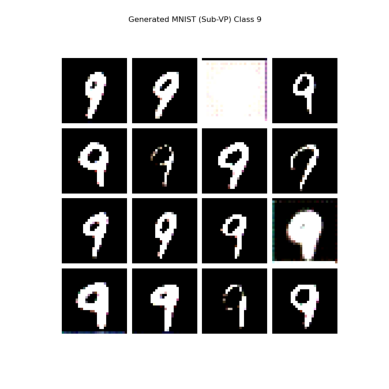

In [9]:
image_path = '../mnist_results/generated_subvp_linear_class9.png'
show_image(image_path)

# Class Conditional  - CIFAR-10

We already have a pretrained model for our dataset. Let's check how easy it is for us to generate a sample from a given class.

We just have to specify the desired class in the following command:

```bash
python main.py --mode generate --process ve --dataset cifar --image_channels 3 --image_size 28 --notebook_tqdm --model_path 'cifar_model/ve_100_conditional.pth' --sampler euler --gen_steps 1000 --gen_eps 0.001 --use_class_condition --target_class 0 --num_generate 16
 ```

where `--target_class` indicates the class we desire.

Let's try it out!

We start generating class 0 (airplanes) using **VE** and **Euler-Maruyama sampler**.

In [1]:
!cd .. && python main.py \
    --mode generate \
    --process ve \
    --dataset cifar10 \
    --image_channels 3 \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'cifar10_model/ve_100_conditional.pth' \
    --sampler euler \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --use_class_condition \
    --target_class 0 \
    --num_generate 16

Using device: cuda
Selected Dataset: CIFAR10
Selected mode: generate
Selected diffusion process: ve
Initializing VE diffusion process with sigma=25.0, T=1.0
Loading model from: cifar10_model/ve_100_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: cifar10_model/ve_100_conditional.pth
Getting ScoreModel configured for VE process.
Model loaded successfully.
Generating 16 CIFAR-10 images (VE) for class 0 using 1000 steps with euler sampler...
Generating 16 images conditionally for class 0.
Generating 16 images using VE reverse SDE...
Sampler: euler, Steps: 1000, T_end=0.001
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to cifar10_results/generated_ve_100_conditional_class0.png


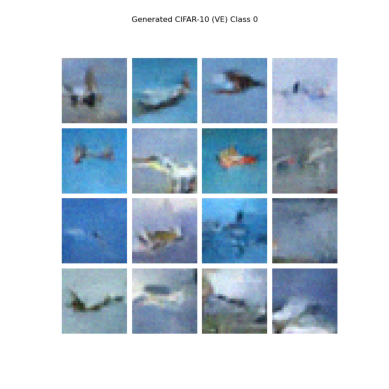

In [3]:
image_path = '../cifar10_results/generated_ve_100_conditional_class0.png'
show_image(image_path)

We can now try with class 7 (horse) and **predictor corrector**.

In [4]:
!cd .. && python main.py \
    --mode generate \
    --process ve \
    --image_channels 3 \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'cifar10_model/ve_100_conditional.pth' \
    --sampler pc \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --use_class_condition \
    --dataset cifar10 \
    --target_class 7 \
    --num_generate 16

Using device: cuda
Selected Dataset: CIFAR10
Selected mode: generate
Selected diffusion process: ve
Initializing VE diffusion process with sigma=25.0, T=1.0
Loading model from: cifar10_model/ve_100_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: cifar10_model/ve_100_conditional.pth
Getting ScoreModel configured for VE process.
Model loaded successfully.
Generating 16 CIFAR-10 images (VE) for class 7 using 1000 steps with pc sampler...
Generating 16 images conditionally for class 7.
Generating 16 images using VE reverse SDE...
Sampler: pc, Steps: 1000, T_end=0.001
PC Sampler Params: SNR=0.1, Corrector Steps=1
Running PC Sampler: snr=0.1, corrector_steps=1
PC Sampling Steps:   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to cifar10_results/generated_ve_100_conditional_class7.png


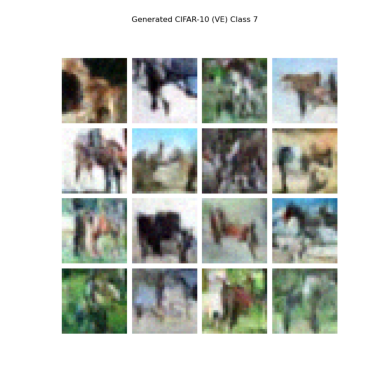

In [5]:
image_path = '../cifar10_results/generated_ve_100_conditional_class7.png'
show_image(image_path)

Now we can try with a **Variance Preserving** process generated images. We'll go for class 5 (dog), using both the **pc** and **exponential** samplers.

In [6]:
!cd .. && python main.py \
    --mode generate \
    --process vp \
    --schedule cosine \
    --dataset cifar10 \
    --image_channels 3 \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'cifar10_model/vp_cosine_100_conditional.pth' \
    --sampler pc \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --use_class_condition \
    --target_class 5 \
    --num_generate 16

Using device: cuda
Selected Dataset: CIFAR10
Selected mode: generate
Selected diffusion process: vp
Using VP Schedule: cosine
Applying default cosine beta clamp [1.0e-07, 1.0]
Initializing VP diffusion process with cosine schedule, T=1.0.
  Cosine schedule using beta clamp: [1.0e-07, 1.0]
Loading model from: cifar10_model/vp_cosine_100_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: cifar10_model/vp_cosine_100_conditional.pth
Getting ScoreModel configured for VP process.
Model loaded successfully.
Generating 16 CIFAR-10 images (VP) for class 5 using 1000 steps with pc sampler...
Generating 16 images conditionally for class 5.
Generating 16 images using VP reverse SDE...
Sampler: pc, Steps: 1000, T_end=0.001
PC Sampler Params: SNR=0.1, Corrector Steps=1
Running PC Sampler: snr=0.1, corrector_steps=1
PC Sampling Steps:   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape 

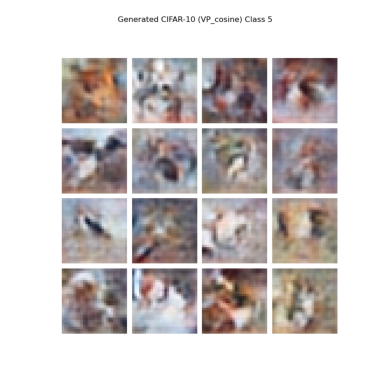

In [7]:
image_path = '../cifar10_results/generated_vp_cosine_100_conditional_class5.png'
show_image(image_path)

In [8]:
!cd .. && python main.py \
    --mode generate \
    --process vp \
    --schedule cosine \
    --dataset cifar10 \
    --image_channels 3 \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'cifar10_model/vp_cosine_100_conditional.pth' \
    --sampler euler \
    --gen_steps 1000 \
    --gen_eps 0.01 \
    --use_class_condition \
    --target_class 5 \
    --num_generate 16

Using device: cuda
Selected Dataset: CIFAR10
Selected mode: generate
Selected diffusion process: vp
Using VP Schedule: cosine
Applying default cosine beta clamp [1.0e-07, 1.0]
Initializing VP diffusion process with cosine schedule, T=1.0.
  Cosine schedule using beta clamp: [1.0e-07, 1.0]
Loading model from: cifar10_model/vp_cosine_100_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: cifar10_model/vp_cosine_100_conditional.pth
Getting ScoreModel configured for VP process.
Model loaded successfully.
Generating 16 CIFAR-10 images (VP) for class 5 using 1000 steps with euler sampler...
Generating 16 images conditionally for class 5.
Generating 16 images using VP reverse SDE...
Sampler: euler, Steps: 1000, T_end=0.01
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated images saved to cifar10_results/generated_vp_cosine_100_conditional_class5.pn

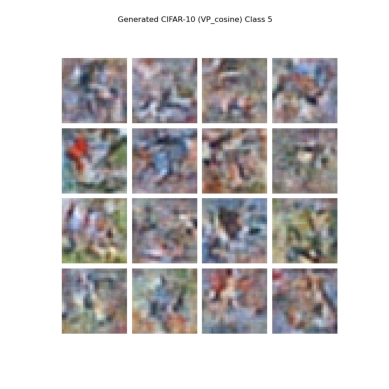

In [9]:
image_path = '../cifar10_results/generated_vp_cosine_100_conditional_class5.png'
show_image(image_path)

We can clearly see that this VP model is far worse than the VE one, meaning more training wold be required.
However, we do not have the required computing capabilities needed for such action.

Let's now see **Sub-VP** with **PC**

In [10]:
!cd .. && python main.py \
    --mode generate \
    --process subvp \
    --schedule cosine \
    --dataset cifar10 \
    --image_channels 3 \
    --image_size 28 \
    --notebook_tqdm \
    --model_path 'cifar10_model/subvp_cosine_100_conditional.pth' \
    --sampler pc \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --use_class_condition \
    --target_class 5 \
    --num_generate 16

Using device: cuda
Selected Dataset: CIFAR10
Selected mode: generate
Selected diffusion process: subvp
Using Sub-VP Schedule: cosine
Initializing Sub-VP diffusion process with cosine schedule, T=1.0.
Loading model from: cifar10_model/subvp_cosine_100_conditional.pth
Loading model as conditional based on --use_class_condition flag.
Loading model from: cifar10_model/subvp_cosine_100_conditional.pth
Getting ScoreModel configured for Sub-VP process.
Model loaded successfully.
Generating 16 CIFAR-10 images (Sub-VP) for class 5 using 1000 steps with pc sampler...
Generating 16 images conditionally for class 5.
Generating 16 images using Sub-VP reverse SDE...
Sampler: pc, Steps: 1000, T_end=0.001
PC Sampler Params: SNR=0.1, Corrector Steps=1
Running PC Sampler: snr=0.1, corrector_steps=1
PC Sampling Steps:   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 28, 28])
Generated i

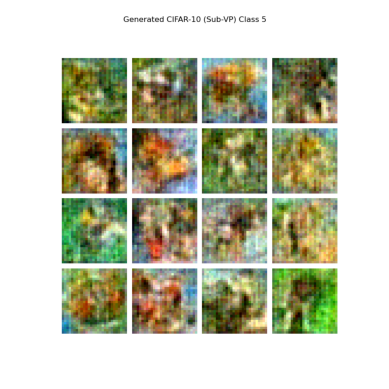

In [11]:
image_path = '../cifar10_results/generated_subvp_cosine_100_conditional_class5.png'
show_image(image_path)

Again, results are not great, and it is kinda hard to see a dog in those images, but we could not achieve better results with our hardware.

Let's now see cars generated with a VE model trained only on that class (so results should be better).

In [12]:
!cd .. && python main.py \
    --mode generate \
    --process ve \
    --image_channels 3 \
    --image_size 32 \
    --notebook_tqdm \
    --model_path 'cifar10_model/ve_uncond_class_1_epoch150.pth' \
    --sampler euler \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --dataset cifar10 \
    --num_generate 16

Using device: cuda
Selected Dataset: CIFAR10
Selected mode: generate
Selected diffusion process: ve
Initializing VE diffusion process with sigma=25.0, T=1.0
Loading model from: cifar10_model/ve_uncond_class_1_epoch150.pth
Loading model as unconditional based on --use_class_condition flag.
Loading model from: cifar10_model/ve_uncond_class_1_epoch150.pth
Getting ScoreModel configured for VE process.
Model loaded successfully.
Generating 16 CIFAR-10 images (VE) (unconditioned) using 1000 steps with euler sampler...
Generating 16 images using VE reverse SDE...
Sampler: euler, Steps: 1000, T_end=0.001
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 32, 32])
Generated images saved to cifar10_results/generated_ve_uncond_class_1_epoch150_uncond.png


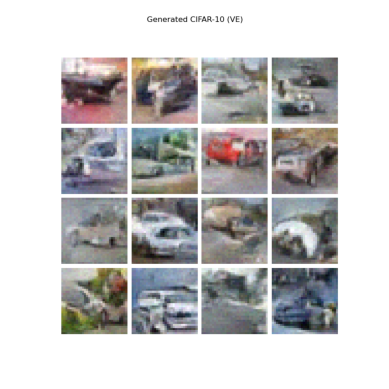

In [13]:
image_path = '../cifar10_results/generated_ve_uncond_class_1_epoch150_uncond.png'
show_image(image_path)

In [14]:
!cd .. && python main.py \
    --mode generate \
    --process ve \
    --image_channels 3 \
    --image_size 32 \
    --notebook_tqdm \
    --model_path 'cifar10_model/ve_uncond_class_1_epoch150.pth' \
    --sampler pc \
    --gen_steps 1000 \
    --gen_eps 0.001 \
    --dataset cifar10 \
    --num_generate 16

Using device: cuda
Selected Dataset: CIFAR10
Selected mode: generate
Selected diffusion process: ve
Initializing VE diffusion process with sigma=25.0, T=1.0
Loading model from: cifar10_model/ve_uncond_class_1_epoch150.pth
Loading model as unconditional based on --use_class_condition flag.
Loading model from: cifar10_model/ve_uncond_class_1_epoch150.pth
Getting ScoreModel configured for VE process.
Model loaded successfully.
Generating 16 CIFAR-10 images (VE) (unconditioned) using 1000 steps with pc sampler...
Generating 16 images using VE reverse SDE...
Sampler: pc, Steps: 1000, T_end=0.001
PC Sampler Params: SNR=0.1, Corrector Steps=1
Running PC Sampler: snr=0.1, corrector_steps=1
PC Sampling Steps:   0%|          | 0/1000 [00:00<?, ?it/s]
Final images clamped to range (-1.0, 1.0).
Image generation finished.
Shape of final_images before plotting: torch.Size([16, 3, 32, 32])
Generated images saved to cifar10_results/generated_ve_uncond_class_1_epoch150_uncond.png


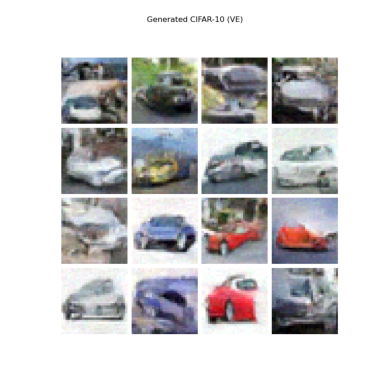

In [15]:
image_path = '../cifar10_results/generated_ve_uncond_class_1_epoch150_uncond.png'
show_image(image_path)